# Phân tích thống kê mô tả

## 9.0 Khái niệm tổng thể (population) và mẫu (sample)

## 9.1 Thống kê mô tả (descriptive statistics, summary)

In [2]:
igfdata <- read.table("igf.txt", header=TRUE, na.strings=".")

In [6]:
attach(igfdata)

In [7]:
names(igfdata)

[1] "id"        "sex"       "age"       "weight"    "height"    "ethnicity"
 [7] "igfi"      "igfbp3"    "als"       "pinp"      "ictp"      "p3np"

In [11]:
mean(age)

[1] 19.17

In [12]:
var(age)

[1] 15.33444

In [13]:
sd(age)

[1] 3.915922

In [14]:
summary(igfdata)

       id             sex                 age            weight     
 Min.   :  1.00   Length:100         Min.   :13.00   Min.   :41.00  
 1st Qu.: 25.75   Class :character   1st Qu.:16.00   1st Qu.:47.00  
 Median : 50.50   Mode  :character   Median :19.00   Median :50.00  
 Mean   : 50.50                      Mean   :19.17   Mean   :49.91  
 3rd Qu.: 75.25                      3rd Qu.:21.25   3rd Qu.:53.00  
 Max.   :100.00                      Max.   :34.00   Max.   :60.00  
     height       ethnicity              igfi            igfbp3     
 Min.   :149.0   Length:100         Min.   : 85.71   Min.   :2.000  
 1st Qu.:157.0   Class :character   1st Qu.:137.17   1st Qu.:3.292  
 Median :162.0   Mode  :character   Median :161.50   Median :3.550  
 Mean   :163.1                      Mean   :165.59   Mean   :3.617  
 3rd Qu.:168.0                      3rd Qu.:186.46   3rd Qu.:3.875  
 Max.   :196.0                      Max.   :427.00   Max.   :5.233  
      als             pinp        

In [15]:
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   16.00   19.00   19.17   21.25   34.00 

In [16]:
desc <- function(x)
{
av <- mean(x)
sd <- sd(x)
se <- sd/sqrt(length(x))
c(MEAN=av, SD=sd, SE=se)
}

In [17]:
desc(als)

MEAN         SD         SE 
301.841120  58.987189   5.898719

In [18]:
by(igfdata, sex, summary)

sex: Female
       id           sex                 age            weight     
 Min.   : 1.0   Length:69          Min.   :13.00   Min.   :41.00  
 1st Qu.:21.0   Class :character   1st Qu.:17.00   1st Qu.:47.00  
 Median :47.0   Mode  :character   Median :19.00   Median :50.00  
 Mean   :48.2                      Mean   :19.59   Mean   :49.35  
 3rd Qu.:75.0                      3rd Qu.:22.00   3rd Qu.:52.00  
 Max.   :99.0                      Max.   :34.00   Max.   :60.00  
     height       ethnicity              igfi            igfbp3     
 Min.   :149.0   Length:69          Min.   : 85.71   Min.   :2.767  
 1st Qu.:156.0   Class :character   1st Qu.:136.67   1st Qu.:3.333  
 Median :162.0   Mode  :character   Median :163.33   Median :3.567  
 Mean   :161.9                      Mean   :167.97   Mean   :3.695  
 3rd Qu.:166.0                      3rd Qu.:186.17   3rd Qu.:3.933  
 Max.   :196.0                      Max.   :427.00   Max.   :5.233  
      als             pinp          

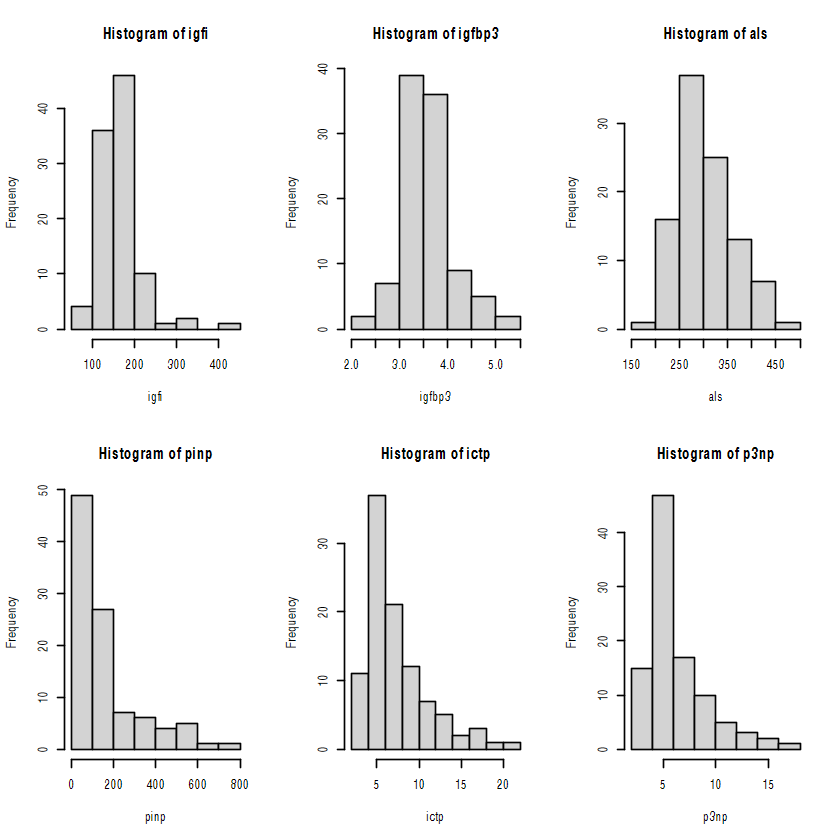

In [29]:
op <- par(mfrow=c(2,3))
hist(igfi)
hist(igfbp3)
hist(als)
hist(pinp)
hist(ictp)
hist(p3np)

## 9.2 Kiểm định xem một biến có phải phân phối chuẩn

Trong phân tích thống kê, phần lớn các phép tính dựa vào giả định biến số phải là
một biến số phân phối chuẩn (normal distribution). Do đó, một trong những việc quan
trọng khi xem xét dữ kiện là phải kiểm định giả thiết phân phối chuẩn của một biến số.
Trong đồ thị trên, chúng ta thấy các biến số như igfi, pinp, ictp và p3np có vẻ
tập trung vào các giá trị thấp và không cân đối, tức dấu hiệu của một sự phân phối không
chuẩn.

In [25]:
names(igfdata)

[1] "id"        "sex"       "age"       "weight"    "height"    "ethnicity"
 [7] "igfi"      "igfbp3"    "als"       "pinp"      "ictp"      "p3np"

Để kiểm định nghiêm chỉnh, chúng ta cần phải sử dụng kiểm định thống kê có tên
là “Shapiro test” và trong R gọi là hàm shapiro.test. Chẳng hạn như kiểm định giả
thiết phân phối chuẩn của biến số pinp,

In [26]:
shapiro.test(pinp)


	Shapiro-Wilk normality test

data:  pinp
W = 0.74804, p-value = 8.314e-12


Vì trị số p (p-value) thấp hơn 0.05, chúng ta có thể kết luận rằng biến số pinp không đáp
ứng luật phân phối chuẩn.

Nhưng với biến số weight (trọng lương cơ thể) thì kiểm định này cho biết đây là một
biến số tuân theo luật phân phối chuẩn vì trị số p > 0.05.

In [27]:
shapiro.test(weight)


	Shapiro-Wilk normality test

data:  weight
W = 0.98867, p-value = 0.5587


Thật ra, kết quả trên cũng phù hợp với đồ thị của weight:

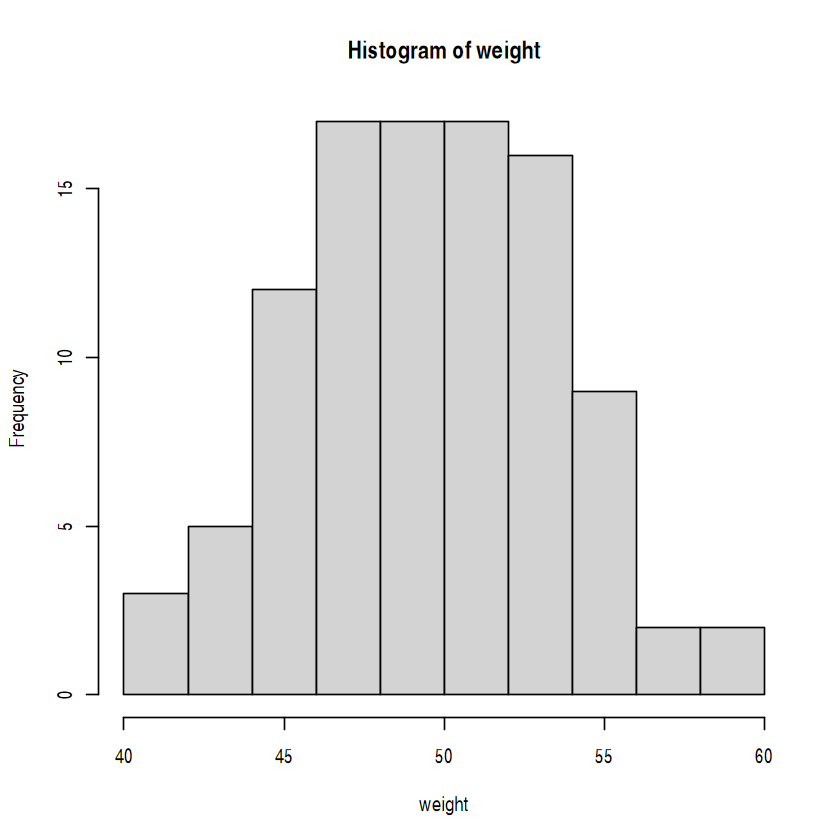

In [28]:
hist(weight)

## 9.3 Thống kê mô tả theo từng nhóm
Nếu chúng ta muốn tính trung bình của một biến số như igfi cho mỗi nhóm nam
và nữ giới, hàm ```tapply``` trong R có thể dùng cho việc này:

In [30]:
tapply(igfi, list(sex), mean)

Female     Male 
167.9741 160.2903

Trong lệnh trên, igfi là biến số chúng ta cần tính, biến số phân nhóm là sex, và chỉ số
thống kê chúng ta muốn là trung bình (mean). Qua kết quả trên, chúng ta thấy số trung
bình của igfi cho nữ giới (167.97) cao hơn nam giới (160.29).

Nhưng nếu chúng ta muốn tính cho từng giới tính và sắc tộc, chúng ta chỉ cần thêm một
biến số trong hàm list:

In [31]:
tapply(igfi, list(ethnicity, sex), mean)

,Female,Male
African,145.1252,120.9168
Asian,165.6589,160.4999
Caucasian,176.6536,169.4790
Others,NA,200.5000


Trong kết quả trên, NA có nghĩa là “not available”, tức không có số liệu cho phụ nữ trong
các sắc tộc “others”.

## 9.4 Kiểm định t (```t.test```)
Kiểm định t dựa vào giả thiết phân phối chuẩn. Có hai loại kiểm định t: kiểm
định t cho một mẫu (one-sample t-test), và kiểm định t cho hai mẫu (two-sample t-test).
Kiểm định t một mẫu nằm trả lời câu hỏi dữ liệu từ một mẫu có phải thật sự bằng một
thông số nào đó hay không. Còn kiểm định t hai mẫu thì nhằm trả lời câu hỏi hai mẫu có
cùng một luật phân phối, hay cụ thể hơn là hai mẫu có thật sự có cùng trị số trung bình
hay không. Tôi sẽ lần lượt minh họa hai kiểm định này qua số liệu ```igfdata``` trên.

### 9.1.1 Kiểm định ```t``` một mẫu
#### Ví dụ 2: 
Qua phân tích trên, chúng ta thấy tuổi trung bình của 100 đối tượng
trong nghiên cứu này là **19.17** tuổi. Chẳng hạn như trong quần thể này, trước đây chúng
ta biết rằng tuổi trung bình là 30 tuổi. Vấn đề đặt ra là có phải mẫu mà chúng ta có được
có đại diện cho quần thể hay không. Nói cách khác, chúng ta muốn biết giá trị trung bình
19.17 có thật sự khác với giá trị trung bình 30 hay không.

Để trả lời câu hỏi này, chúng ta sử dụng kiểm định t. Theo lí thuyết thống kê,
kiểm định t được định nghĩa bằng công thức sau đây:
$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} \$$

Trong đó, $ \bar{x} \$ là giá trị trung bình của mẫu, μ là trung bình theo giả thiết (trong trường
hợp này, 30), s là độ lệch chuẩn, và n là số lượng mẫu (100). Nếu giá trị t cao hơn giá trị
lí thuyết theo phân phối t ở một tiêu chuẩn có ý nghĩa như 5% chẳng hạn thì chúng ta có
lí do để phát biểu khác biệt có ý nghĩa thống kê. Giá trị này cho mẫu 100 có thể tính toán
bằng hàm qt của R như sau:

In [33]:
qt(0.95, 100)

[1] 1.660234

Nhưng có một cách tính toán nhanh gọn hơn để trả lời câu hỏi trên, bằng cách dùng hàm
**t.test** như sau:

In [34]:
t.test(age, mu=30)


	One Sample t-test

data:  age
t = -27.656, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 18.393 19.947
sample estimates:
mean of x 
    19.17 


Trong lệnh trên age là biến số chúng ta cần kiểm định, và mu=30 là giá trị giả thiết. R
trình bày trị số t = -27.66, với 99 bậc tự do, và trị số p < 2.2e-16 (tức rất thấp). R
cũng cho biết độ tin cậy 95% của age là từ 18.4 tuổi đến 19.9 tuổi (30 tuổi nằm quá ngoài
khoảng tin cậy này). Nói cách khác, chúng ta có lí do để phát biểu rằng độ tuổi trung
bình trong mẫu này thật sự thấp hơn độ tuổi trung bình của quần thể.

### 9.4.2 Kiểm định ```t``` hai mẫu
**Ví dụ 3.** Qua phân tích mô tả trên (phầm summary) chúng ta thấy phụ nữ có độ
hormone igfi cao hơn nam giới (167.97 và 160.29). Câu hỏi đặt ra là có phải thật sự đó
là một khác biệt có hệ thống hay do các yếu tố ngẫu nhiên gây nên. Trả lời câu hỏi này,
chúng ta cần xem xét mức độ khác biệt trung bình giữa hai nhóm và độ lệch chuẩn của độ
khác biệt.

$$t = \frac{\overline{x}_2 - \overline{x}_1}{\text{SED}} $$

Trong đó x1 và x2 là số trung bình của hai nhóm nam và nữ, và SED là độ lệch chuẩn của ( x1 - x2 ) . Thực ra, SED có thể ước tính bằng công thức:
$$ SED = \sqrt{SE_1^2 + SE_2^2} \$$

Trong đó SE1 và SE2 là sai số chuẩn (standard error) của hai nhóm nam và nữ. Theo lí thuyết xác suất, t tuân theo luật phân phối t với bậc tự do n1 + n2 - 2 , trong đó n1 và n2 là số mẫu của hai nhóm. Chúng ta có thể dùng R để trả lời câu hỏi trên bằng hàm t.test như sau:

In [35]:
t.test(igfi~ sex)


	Welch Two Sample t-test

data:  igfi by sex
t = 0.84117, df = 88.329, p-value = 0.4025
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -10.46855  25.83627
sample estimates:
mean in group Female   mean in group Male 
            167.9741             160.2903 


R trình bày các giá trị quan trọng trước hết:
t = 0.8412, df = 88.329, p-value = 0.4025

df là bậc tự do. Trị số p = 0.4025 cho thấy mức độ khác biệt giữa hai nhóm nam và nữ
không có ý nghĩa thống kê (vì cao hơn 0.05 hay 5%).

95 percent confidence interval: -10.46855 25.83627

là khoảng tin cậy 95% về độ khác biệt giữa hai nhóm. Kết quả tính toán trên cho biết độ
igf ở nữ giới có thể thấp hơn nam giới 10.5 ng/L hoặc cao hơn nam giới khoảng 25.8
ng/L. Vì độ khác biệt quá lớn và đó là thêm bằng chứng cho thấy không có khác biệt có
ý nghĩa thống kê giữa hai nhóm.

Kiểm định trên dựa vào giả thiết hai nhóm nam và nữ có khác phương sai. Nếu
chúng ta có lí do đề cho rằng hai nhóm có cùng phương sai, chúng ta chỉ thay đổi một
thông số trong hàm t với var.equal=TRUE như sau:

In [36]:
t.test(igfi~ sex, var.equal=TRUE)


	Two Sample t-test

data:  igfi by sex
t = 0.70708, df = 98, p-value = 0.4812
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -13.88137  29.24909
sample estimates:
mean in group Female   mean in group Male 
            167.9741             160.2903 


### 9.5 So sánh phương sai (var.test)
Bây giờ chúng ta thử kiểm định xem phương sai giữa hai nhóm có khác nhau không. Để
tiến hành phân tích, chúng ta chỉ cần lệnh:


In [37]:
var.test(igfi ~ sex)


	F test to compare two variances

data:  igfi by sex
F = 2.6274, num df = 68, denom df = 30, p-value = 0.004529
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.366187 4.691336
sample estimates:
ratio of variances 
          2.627396 


Kết quả trên cho thấy độ khác biệt về phương sai giữa hai nhóm cao 2.62 lần. Trị số p =
0.0045 cho thấy phương sai giữa hai nhóm khác nhau có ý nghĩa thống kê. Như vậy,
chúng ta chấp nhận kết quả phân tích của hàm t.test(igfi~ sex).

### 9.6 Kiểm định Wilcoxon cho hai mẫu (wilcox.test)
Kiểm định t dựa vào giả thiết là phân phối của một biến phải tuân theo luật phân
phối chuẩn. Nếu giả định này không đúng, kết quả của kiểm định t có thể không hợp lí
(valid). Để kiểm định phân phối của igfi, chúng ta có thể dùng hàm shapiro.test
như sau:

In [38]:
shapiro.test(igfi)


	Shapiro-Wilk normality test

data:  igfi
W = 0.85278, p-value = 1.504e-08


Trị số p nhỏ hơn 0.05 rất nhiều, cho nên chúng ta có thể nói rằng phân phối của igfi
không tuân theo luật phân phối chuẩn. Trong trường hợp này, việc so sánh giữa hai
nhóm có thể dựa vào phương pháp phi tham số (non-parametric) có tên là kiểm định Wilcoxon, vì kiểm định này (không như kiểm định t) không tùy thuộc vào giả định phân
phối chuẩn.

In [39]:
wilcox.test(igfi ~ sex)


	Wilcoxon rank sum test with continuity correction

data:  igfi by sex
W = 1125, p-value = 0.6819
alternative hypothesis: true location shift is not equal to 0


Trị số p = 0.682 cho thấy quả thật độ khác biệt về igfi giữa hai nhóm nam và nữ không
có ý nghĩa thống kê. Kết luận này cũng không khác với kết quả phân tích bằng kiểm định
t.

### 9.7 Kiểm định t cho các biến số theo cặp (paired t-test,t.test)
Kiểm định t vừa trình bày trên là cho các nghiên cứu gồm hai nhóm độc lập nhau
(như giữa hai nhóm nam và nữ), nhưng không thể ứng dụng cho các nghiên cứu mà một
nhóm đối tượng được theo dõi theo thời gian. Tôi tạm gọi các nghiên cứu này là nghiên
cứu theo cặp. Trong các nghiên cứu này, chúng ta cần sử dụng một kiểm định t có tên là
paired t-test.

Ví dụ 4. Một nhóm bệnh nhân gồm 10 người được điều trị bằng một thuốc nhằm
giảm huyết áp. Huyết áp của bệnh nhân được đo lúc khởi đầu nghiên cứu (lúc chưa điều
trị), và sau khi điều khị. Số liệu huyết áp của 10 bệnh nhân như sau:

In [40]:
# nhập dữ kiện
before <- c(180, 140, 160, 160, 220, 185, 145, 160, 160, 170)
after <- c(170, 145, 145, 125, 205, 185, 150, 150, 145, 155)
bp <- data.frame(before, after)

Câu hỏi đặt ra là độ biến chuyển huyết áp trên có đủ để kết luận rằng thuốc điều trị có
hiệu quả giảm áp huyết. Để trả lời câu hỏi này, chúng ta dùng kiểm định t cho từng cặp
như sau:

In [42]:
# kiểm định t
t.test(before, after, paired=TRUE)


	Paired t-test

data:  before and after
t = 2.7924, df = 9, p-value = 0.02097
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
  1.993901 19.006099
sample estimates:
mean difference 
           10.5 


Kết quả trên cho thấy sau khi điều trị áp suất máu giảm 10.5 mmHg, và khoảng tin cậy
95% là từ 2.0 mmHg đến 19 mmHg, với trị số p = 0.0209. Như vậy, chúng ta có bằng
chứng để phát biểu rằng mức độ giảm huyết áp có ý nghĩa thống kê.

In [43]:
t.test(before, after)


	Welch Two Sample t-test

data:  before and after
t = 1.0208, df = 17.998, p-value = 0.3209
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.11065  32.11065
sample estimates:
mean of x mean of y 
    168.0     157.5 


Chú ý nếu chúng ta phân tích phương sai bằng kiểm định thống kê cho hai nhóm độc lập dưới đây
thì trị số p = 0.32 cho biết mức độ giảm áp suất không có ý nghĩa thống kê!

### 9.8 Kiểm định Wilcoxon cho các biến số theo cặp (wilcox.test)
Thay vì dùng kiểm định t cho từng cặp, chúng ta cũng có thể sử dụng hàm
wilcox.test cho cùng mục đích:

In [44]:
wilcox.test(before, after, paired=TRUE)

Warning message in wilcox.test.default(before, after, paired = TRUE):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(before, after, paired = TRUE):
"cannot compute exact p-value with zeroes"



	Wilcoxon signed rank test with continuity correction

data:  before and after
V = 42, p-value = 0.02291
alternative hypothesis: true location shift is not equal to 0


Kết quả trên một lần nữa khẳng định rằng độ giảm áp suất máu có ý nghĩa thống kê với
trị số (p=0.023) chẳng khác mấy so với kiểm định t cho từng cặp.

### 9.9 Tần số (frequency)
Hàm table trong R có chức năng cho chúng ta biết về tần số của một biến số
mang tính phân loại như sex và ethnicity.

In [45]:
table(sex)

sex
Female   Male 
    69     31 

In [46]:
table(ethnicity)

ethnicity
  African     Asian Caucasian    Others 
        8        60        30         2 

Chú ý trong các bảng thống kê trên, hàm table không cung cấp cho chúng ta số phần
trăm. Để tính số phần t

In [47]:
# tạo ra một object tên là freq để chứa kết quả tần số
freq <- table(sex, ethnicity)
# kiểm tra kết quả
freq

        ethnicity
sex      African Asian Caucasian Others
  Female       4    43        22      0
  Male         4    17         8      2

In [48]:
# dùng hàm margin.table để xem kết quả
margin.table(freq, 1)

sex
Female   Male 
    69     31 

In [49]:
margin.table(freq, 2)

ethnicity
  African     Asian Caucasian    Others 
        8        60        30         2 

In [51]:
# tính phần trăm bằng hàm prop.table
prop.table(freq, 1)

        ethnicity
sex         African      Asian  Caucasian     Others
  Female 0.05797101 0.62318841 0.31884058 0.00000000
  Male   0.12903226 0.54838710 0.25806452 0.06451613

Trong bảng thống kê trên, prop.table tính tỉ lệ sắc tộc cho từng giới tính. Chẳng hạn
như ở nữ giới (female), 5.8% là người Phi châu, 62.3% là người Á châu, 31.8% là người
Tây phương da trắng . Tổng cộng là 100%. Tương tự, ớ nam giới tỉ lệ người Phi châu là
12.9%, Á châu là 54.8%, v.v…

In [52]:
# tính phần trăm bằng hàm prop.table
prop.table(freq, 2)

        ethnicity
sex        African     Asian Caucasian    Others
  Female 0.5000000 0.7166667 0.7333333 0.0000000
  Male   0.5000000 0.2833333 0.2666667 1.0000000

Trong bảng thống kê trên, prop.table tính tỉ lệ giới tính cho từng sắc tộc. Chẳng hạn
như trong nhóm người Á châu, 71.7% là nữ và 28.3% là nam.

In [54]:
# tính phần trăm cho toàn bộ bảng
freq/sum(freq)

        ethnicity
sex      African Asian Caucasian Others
  Female    0.04  0.43      0.22   0.00
  Male      0.04  0.17      0.08   0.02

### 9.10 Kiểm định tỉ lệ (proportion test, prop.test,)
binom.test)
Kiểm định một tỉ lệ thường dựa vào giả định phân phối nhị phân (binomial distribution).
Với một số mẫu n và tỉ lệ p, và nếu n lớn (tức hơn 50 chẳng hạn), thì phân phối nhị phân
có thể tương đương với phân phối chuẩn với số trung bình np và phương sai np(1 – p).
Gọi x là số biến cố mà chúng ta quan tâm, kiểm định giả thiết p = π có thể sử dụng thống
kê sau đây:
$$z = \frac{x - n\pi}{\sqrt{n\pi(1-\pi)}}$$

Ở đây, z tuân theo luật phân phối chuẩn với trung bình 0 và phương sai 1. Cũng có thể
nói $ z^2$ tuân theo luật phân phối Chi bình phương với bậc tự do bằng 1.

**Ví dụ 5.** Trong nghiên cứu trên, chúng ta thấy có 69 nữ và 31 nam. Như vậy tỉ lệ
nữ là 0.69 (hay 69%). Để kiểm định xem tỉ lệ này có thật sự khác với tỉ lệ 0.5 hay
không, chúng ta có thể sử dụng hàm prop.test(x, n, π) như sau:

In [55]:
prop.test(69, 100, 0.50)


	1-sample proportions test with continuity correction

data:  69 out of 100, null probability 0.5
X-squared = 13.69, df = 1, p-value = 0.0002156
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5885509 0.7766330
sample estimates:
   p 
0.69 


In [57]:
binom.test(69, 100, 0.50)


	Exact binomial test

data:  69 and 100
number of successes = 69, number of trials = 100, p-value = 0.0001831
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5896854 0.7787112
sample estimates:
probability of success 
                  0.69 


Nói chung, kết quả của kiểm định nhị phân không khác gì so với kiểm định Chi bình
phương, với trị số p = 0.00018, chúng ta càng có bằng chứng để kết luận rằng tỉ lệ nữ giới
trong nghiên cứu này thật sự cao hơn 50%.

### 9.11 So sánh hai tỉ lệ (prop.test, binom.test)

Phương pháp so sánh hai tỉ lệ có thể khai triển trực tiếp từ lí thuyết kiểm định một tỉ lệ
vừa trình bày trên. Cho hai mẫu với số đối tượng $n_1$ và $n_2$, và số biến cố là $x_1$ và $x_2$. Do
đó, chúng ta có thể ước tính hai tỉ lệ $p_1$ và $p_2$. Lí thuyết xác suất cho phép chúng ta phát
biểu rằng độ khác biệt giữa hai mẫu $d = p1 – p2 $ tuân theo luật phân phối chuẩn với số
trung bình 0 và phương sai bằng:
$$V_d = \left(\frac{1}{n_1} + \frac{1}{n_2}\right) p(1-p)$$
Trong đó:
$$p = \frac{x_1 + x_2}{n_1 + n_2}$$

Thành ra, $z = d/Vd$ tuân theo luật phân phối chuẩn với trung bình 0 và phương sai 1. Nói
cách khác, $z^2$ tuân theo luật phân phối Chi bình phương với bậc tự do bằng 1. Do đó,
chúng ta cũng có thể sử dụng prop.test để kiểm định hai tỉ lệ.

**Ví dụ 6.** Một nghiên cứu được tiến hành so sánh hiệu quả của thuốc chống gãy
xương. Bệnh nhân được chia thành hai nhóm: nhóm A được điều trị gồm có 100 bệnh
nhân, và nhóm B không được điều trị gồm 110 bệnh nhân. Sau thời gian 12 tháng theo
dõi, nhóm A có 7 người bị gãy xương, và nhóm B có 20 người gãy xương. Vấn đề đặt ra
là tỉ lệ gãy xương trong hai nhóm này bằng nhau (tức thuốc không có hiệu quả)? Để
kiểm định xem hai tỉ lệ này có thật sự khác nhau, chúng ta có thể sử dụng hàm
prop.test(x, n, π) như sau:

In [58]:
fracture <- c(7, 20)
total <- c(100, 110)
prop.test(fracture, total)


	2-sample test for equality of proportions with continuity correction

data:  fracture out of total
X-squared = 4.8901, df = 1, p-value = 0.02701
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.20908963 -0.01454673
sample estimates:
   prop 1    prop 2 
0.0700000 0.1818182 


Kết quả phân tích trên cho thấy tỉ lệ gãy xương trong nhóm 1 là 0.07 và nhóm 2 là 0.18.
Phân tích trên còn cho thấy xác suất 95% rằng độ khác biệt giữa hai nhóm có thể 0.01
đến 0.20 (tức 1 đến 20%). Với trị số p = 0.027, chúng ta có thể nói rằng tỉ lệ gãy xương
trong nhóm A quả thật thấp hơn nhóm B.

### 9.12 So sánh nhiều tỉ lệ (prop.test, chisq.test)
Kiểm định prop.test còn có thể sử dụng để kiểm định nhiều tỉ lệ cùng một lúc.
Trong nghiên cứu trên, chúng ta có 4 nhóm sắc tộc và tần số cho từng giới tính như sau:

In [59]:
table(sex, ethnicity)

        ethnicity
sex      African Asian Caucasian Others
  Female       4    43        22      0
  Male         4    17         8      2

Chúng ta muốn biết tỉ lệ nữ giới giữa 4 nhóm sắc tộc có khác nhau hay không, và để trả
lời câu hỏi này, chúng ta lại dùng prop.test như sau:

In [60]:
female <- c( 4, 43, 22, 0)
total <- c(8, 60, 30, 2)
prop.test(female, total)

Warning message in prop.test(female, total):
"Chi-squared approximation may be incorrect"



	4-sample test for equality of proportions without continuity correction

data:  female out of total
X-squared = 6.2646, df = 3, p-value = 0.09942
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4 
0.5000000 0.7166667 0.7333333 0.0000000 


Tuy tỉ lệ nữ giới giữa các nhóm có vẻ khác nhau lớn (73% trong nhóm 3 (người da trắng)
so với 50% trong nhóm 1 (Phi châu) và 71.7% trong nhóm Á châu, nhưng kiểm định Chi
bình phương cho biết trên phương diện thống kê, các tỉ lệ này không khác nhau, vì trị số
p = 0.099.

### 9.12.1 Kiểm định Chi bình phương (Chi squared test, chisq.test)
Thật ra, kiểm định Chi bình phương còn có thể tính toán bằng hàm chisq.test như
sau:

In [61]:
chisq.test(sex, ethnicity)

Warning message in chisq.test(sex, ethnicity):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  sex and ethnicity
X-squared = 6.2646, df = 3, p-value = 0.09942


Kết quả này hoàn toàn giống với kết quả từ hàm prop.test.

### 9.12.2 Kiểm định Fisher (Fisher’s exact test, fisher.test)

Trong kiểm định Chi bình phương trên, chúng ta chú ý cảnh báo:

***Warning message: mation may be incorrect in: prop.test(female, total)***

Vì trong nhóm 4, không có nữ giới cho nên tỉ lệ là 0%. Hơn nữa, trong nhóm này chỉ có
2 đối tượng. Vì số lượng đối tượng quá nhỏ, cho nên các ước tính thống kê có thể không
đáng tin cậy. Một phương pháp khác có thể áp dụng cho các nghiên cứu với tần số thấp
như trên là kiểm định fisher (còn gọi là Fisher’s exact test). Bạn đọc có thể tham khảo
lí thuyết đằng sau kiểm định fisher để hiểu rõ hơn về logic của phương pháp này, nhưng
ở đây, chúng ta chỉ quan tâm đến cách dùng R để tính toán kiểm định này. Chúng ta chỉ
đơn giản lệnh:

In [62]:
fisher.test(sex, ethnicity)


	Fisher's Exact Test for Count Data

data:  sex and ethnicity
p-value = 0.1048
alternative hypothesis: two.sided


Chú ý trị số p từ kiểm định Fisher là 0.1048, tức rất gần với trị số p của kiểm định Chi
bình phương. Cho nên, chúng ta có thêm bằng chứng để khẳng định rằng tỉ lệ nữ giới
giữa các sắc tộc không khác nhau một cách đáng kể.